# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Datagath">Data Gathering</a></li>
<li><a href="#Assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Cleaning Data</a></li>
<li><a href="#Storing">Storing Data</a></li>
<li><a href="#visualisation">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction
The goal of this project is to explore the Twitter data from WeRateDogs to create interesting and reliable analyses and visualizations. Twitter archives are great, but they only contain very basic information about tweets. Additional collection, evaluation, and cleaning are required for analysis and visualization.
### Dataset Description 
**1. Improved Twitter archive**

The WeRateDogs Twitter archive contains basic data on all 5,000+ tweets, but not everything. One column of the archive does, however, contain: the text of each tweet, which I used to extract the rating, the dog's name, and the dog's "steps" (i.e., doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5,000+ tweets, I filtered out the tweets with notes only (there are 2356).

**2. Additional data via the Twitter API**

Back to the basics of the Twitter archive: the number of retweets and the number of favorites are two of the notable omissions from the column. Fortunately, this additional data can be collected by anyone from the Twitter API. Well, "anyone" with access to data from the most recent 3,000 tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs it contains, can collect this data for all 5,000+ tweets. And guess what? You're going to query the Twitter API to collect this valuable data.

**3. Image prediction file**

Another interesting thing: I ran all the images in the WeRateDogs Twitter archive through a neural network capable of classifying dog breeds*. The results: a table full of image predictions (the first three only) with the ID of each tweet, the URL of the image and the number of the image corresponding to the safest prediction (numbered from 1 to 4 since tweets can contain up to four images).

<a id='Datagath'></a>
## Data Gathering
In the cell below, we gather all three pieces of data for this project and load them in the notebook. 


In [1]:
#Loads packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

from timeit import default_timer as timer


In [2]:
### define function to set up the path of environment

def set_path (path=None):
    import os
    """
    Define the path of your files with this function. This function  help you to avoid writing long paths to files (dataset) 
    when reading by pandas especially when your datasets are not in the same folder as your notebook.
    Parameters:
    path : directory of the .csv files
    
    """
    if path == None:
        print("Path is not written, please set up the directory of your files!")
    else:
        os.chdir(path)
        print("****CSV files present in your directory****")
        for files in os.listdir():
            if files.endswith('.csv'):
                print(files) 

In [3]:
### Change my working directory
set_path(path = "D:\Python_Project\ALTx")

****CSV files present in your directory****
online-job-postings.csv
twitter-archive-enhanced.csv


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#Load dataset
df_twitt_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [767]:
#get the 5 first views
df_twitt_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
#Requests for urls
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url) 
url_content = response.content

In [8]:
#download tsv files
csv_file = open('image_predictions.tsv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [782]:
#Loads dataset
image_df = pd.read_csv('image_predictions.tsv', sep= '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [22]:
#Install tweepy 
!pip install --upgrade tweepy

In [117]:
#Import tweepy
import tweepy

In [68]:
#Import my credentials from previous my keys.py files
from keys import *

In [69]:
#Get tweepy client
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [114]:
#Download data from api
ids_tweet = df_twitt_arch.tweet_id.values
print(ids_tweet)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in ids_tweet:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = client.get_tweets(ids=tweet_id, tweet_fields=['created_at', 'public_metrics'])
            #print("Success")
            json.dump(tweet.json(), outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]


Rate limit exceeded. Sleeping for 727 seconds.
Rate limit exceeded. Sleeping for 716 seconds.
Rate limit exceeded. Sleeping for 719 seconds.
Rate limit exceeded. Sleeping for 727 seconds.


3630.2813645999995
{}


In [152]:
#reading the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count
df = []
error_id = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        try:
            tweet_id = tweet["data"][0]['id']
            create_date = tweet["data"][0]["created_at"]
            retweet_count = tweet["data"][0]['public_metrics']['retweet_count']
            like_count = tweet["data"][0]['public_metrics']['like_count']
            reply_count = tweet["data"][0]['public_metrics']['reply_count']

            df.append({'tweet_id' : tweet_id,
                       'create_date' : create_date,
                       'retweet_count' : retweet_count,
                      'like_count' : like_count,
                       'reply_count' : reply_count  
                      })
        except KeyError:
            error_id.append(tweet["errors"][0]['value'])
            
print(f"There are {len(error_id)} whose tweets are no longer available.")
            
#saving the tweet-json.txt file into a dataframe called twitter_extra
dataset_extra_tweets = pd.DataFrame(df, columns = ['tweet_id', 'create_date', 'retweet_count', 'like_count', 'reply_count'])

There are 29 whose tweets are no longer available.


In [153]:
#print errors id
print(error_id)

['888202515573088257', '873697596434513921', '872668790621863937', '872261713294495745', '869988702071779329', '866816280283807744', '861769973181624320', '856602993587888130', '856330835276025856', '851953902622658560', '851861385021730816', '845459076796616705', '844704788403113984', '842892208864923648', '837366284874571778', '837012587749474308', '829374341691346946', '827228250799742977', '812747805718642688', '802247111496568832', '779123168116150273', '775096608509886464', '771004394259247104', '770743923962707968', '766864461642756096', '759923798737051648', '759566828574212096', '754011816964026368', '680055455951884288']


In [768]:
#Get 5 first view
dataset_extra_tweets.head()

,tweet_id,create_date,retweet_count,like_count,reply_count
0,892420643555336193,2017-08-01T16:23:56.000Z,6976,33702,139
1,892177421306343426,2017-08-01T00:17:27.000Z,5278,29231,170
2,891815181378084864,2017-07-31T00:18:03.000Z,3466,21975,110
3,891689557279858688,2017-07-30T15:58:51.000Z,7190,36781,142
4,891327558926688256,2017-07-29T16:00:24.000Z,7723,35168,193


<a id='Assessing'></a>
## Assessing Data
In this section, we detect and document at quality issues and tidiness issue. Then we use both visual assessment and
programmatic assessement to assess the data.

### Visual Assessment

In [159]:
#display dataset
display(df_twitt_arch)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [160]:
#display dataset
display(image_df)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [161]:
#display dataset
display(dataset_extra_tweets)

,tweet_id,create_date,retweet_count,like_count,reply_count
0,892420643555336193,2017-08-01T16:23:56.000Z,6976,33702,139
1,892177421306343426,2017-08-01T00:17:27.000Z,5278,29231,170
2,891815181378084864,2017-07-31T00:18:03.000Z,3466,21975,110
3,891689557279858688,2017-07-30T15:58:51.000Z,7190,36781,142
4,891327558926688256,2017-07-29T16:00:24.000Z,7723,35168,193
...,...,...,...,...,...
2322,666049248165822465,2015-11-16T00:24:50.000Z,36,88,9
2323,666044226329800704,2015-11-16T00:04:52.000Z,115,245,1
2324,666033412701032449,2015-11-15T23:21:54.000Z,36,100,1
2325,666029285002620928,2015-11-15T23:05:30.000Z,39,112,0


### Programmatical Assessment

**1. Improved Twitter archive**

In [770]:
#display 5 sample of dataset
df_twitt_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tyrone. He's a leaf wiz...,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026...,11,10,a,None,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None
1591,686606069955735556,NaN,NaN,2016-01-11 17:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/686606069...,10,10,Horace,None,None,None,None


In [769]:
#get dataset info
df_twitt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [771]:
#check null 
df_twitt_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [772]:
#check duplicates
df_twitt_arch.duplicated().sum()

0

In [773]:
df_twitt_arch[df_twitt_arch["tweet_id"].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [774]:
#check duplicates in expanded_urls
df_twitt_arch.expanded_urls.duplicated().sum()

137

In [776]:
#get value count of column name
df_twitt_arch['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [777]:
#get value count of column name#get value count of column name
df_twitt_arch.groupby('name')['name'].value_counts()

name          name        
Abby          Abby            2
Ace           Ace             1
Acro          Acro            1
Adele         Adele           1
Aiden         Aiden           1
                             ..
such          such            1
the           the             8
this          this            1
unacceptable  unacceptable    1
very          very            5
Name: name, Length: 957, dtype: int64

In [778]:
#check row with anorma words like "the" in column name
df_twitt_arch[df_twitt_arch['name'] == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


**2. Additional data via the Twitter API**

In [785]:
#display 5 sample of dataset
dataset_extra_tweets.sample(10)

,tweet_id,create_date,retweet_count,like_count,reply_count
1204,713175907180089344,2016-03-25T01:29:21.000Z,1330,4076,23
1723,678969228704284672,2015-12-21T16:04:13.000Z,408,1498,15
626,793150605191548928,2016-10-31T18:00:14.000Z,1592,5830,30
2252,667369227918143488,2015-11-19T15:49:57.000Z,144,328,1
836,763103485927849985,2016-08-09T20:03:43.000Z,2109,6908,46
1160,718454725339934721,2016-04-08T15:05:29.000Z,1375,4505,14
1451,693582294167244802,2016-01-30T23:51:19.000Z,223,1516,5
1718,679111216690831360,2015-12-22T01:28:25.000Z,2306,5418,76
2055,670807719151067136,2015-11-29T03:33:17.000Z,425,1052,7
218,848212111729840128,2017-04-01T16:35:01.000Z,2712,15019,111


In [786]:
#get dataset info
dataset_extra_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2327 non-null   object
 1   create_date    2327 non-null   object
 2   retweet_count  2327 non-null   int64 
 3   like_count     2327 non-null   int64 
 4   reply_count    2327 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [787]:
#Get summary of dataset
dataset_extra_tweets.describe()

,retweet_count,like_count,reply_count
count,2327.000000,2327.000000,2327.000000
mean,2460.445208,7027.605071,42.143962
std,4167.012874,10919.147075,70.713295
min,1.000000,0.000000,0.000000
25%,492.500000,1221.000000,9.000000
50%,1146.000000,3038.000000,23.000000
75%,2846.000000,8567.000000,48.000000
max,70398.000000,144273.000000,1120.000000


In [788]:
#check nan values
dataset_extra_tweets.isna().sum()

tweet_id         0
create_date      0
retweet_count    0
like_count       0
reply_count      0
dtype: int64

In [789]:
#check duplicates
dataset_extra_tweets.tweet_id.duplicated().sum()

0

In [790]:
#Check tweet_id duplicate in list of serie of the 3 dataset
all_columns = pd.Series(list(df_twitt_arch) + list(image_df) + list(dataset_extra_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

**3. Image prediction file**

In [775]:
#display 5 sample of dataset
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1731,821107785811234820,https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg,1,Pomeranian,0.856590,True,papillon,0.038537,True,Yorkshire_terrier,0.033146,True
269,670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,American_Staffordshire_terrier,0.919714,True,Staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
235,670427002554466305,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,0.003226,True
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True


In [779]:
#get dataset info
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [780]:
#check duplicates
image_df[image_df["tweet_id"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [783]:
#check duplicates
image_df[image_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [784]:
#get value count of column name
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality issues
**1. Improved Twitter archive**
1. retweeted_status_timestamp and timestamp columns are stored as object instead of datetime format in archive twitter dataset.
2. These columns ID 'name', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' type are int and float instead of string. format in archive twitter dataset.
3. In many rows value are "None" instead of NaN
4. Duplicated values exists in expanded_url column
5. Dog name column have many wrong name such as "The", "a", "an"", etc.
6. Reformat source column displayed as url ie '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

**2. Additional data via the Twitter API**
1. Create_date is object instead of datetime and convert tweet_id to string

**3. Image prediction file**
1. Tweet_id is stored as int values and Columns p1,p2,p3 and jpg_url are stored as object should be strings
2. Some tweet_id have the same jpg_url in the image prediction dataset

### Tidiness issues
**1. Improved Twitter archive**
1. doggo, floofer, pupper, puppo are spread in different columns.

2. Drop all columns related retweets like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.
3. Drop all columns related reply tweet like in_reply_to_status_id and in_reply_to_user_id.
4. there are two columns of ration insted of having only one ratio

**2. Image prediction file**
1. Breed Predictions, Confidence intervals and Dog tests are spread in three columns.

**3. Dataset merged**
1. All dataframes should be merged into 1 using tweet_id
2. Two timestamp already exists, remove one

<a id='Cleaning'></a>
## Cleaning Data
In this section, we clean all of the issues we documented while assessing. Finally we merge all datasets into one.

In [559]:
# Make copies of original pieces of data
twitter_df_clean = df_twitt_arch.copy()
image_df_clean = image_df.copy()
tweet_extra_df_clean = dataset_extra_tweets.copy()

**1. Improved Twitter archive**

### Issue #1: retweeted_status_timestamp and timestamp columns are stored as object instead of datetime format in archive twitter dataset.

#### Define: Convert retweeted_status_timestamp and timestamp column from object datatype to datetime using to_datetime method of pandas

#### Code

In [560]:
#convert from objet to date
twitter_df_clean['timestamp']= pd.to_datetime(twitter_df_clean['timestamp'])
twitter_df_clean['retweeted_status_timestamp']= pd.to_datetime(twitter_df_clean['retweeted_status_timestamp'])

#### Test

In [211]:
#get dataset info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:  These columns ID 'name', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' type are int and float instead of string. format in archive twitter dataset.

#### Define: Convert all these columns from int or float datatype to string using as_type method of pandas

#### Code

In [561]:
#convertion
list_of_cols = ['name','tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']

for cols in list_of_cols:
    twitter_df_clean[cols] = twitter_df_clean[cols].astype('string')


#### Test

In [219]:
#get dataset info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   string             
 1   in_reply_to_status_id       2219 non-null   string             
 2   in_reply_to_user_id         2219 non-null   string             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         2219 non-null   string             
 7   retweeted_status_user_id    2219 non-null   string             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

### Issue #3: In many rows value are "None" instead of NaN

#### Define: Use replace method to change where is "None" by NaN 

#### Code

In [562]:
#replace None by Nan
for cols in twitter_df_clean.columns:
    twitter_df_clean[cols].replace('None', np.NaN, inplace=True)

#### Test

In [391]:
#check the count
twitter_df_clean.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

### Issue #4: Duplicated values exists in expanded_url column

#### Define: Remove these duplicate values

#### Code

In [563]:
#drop duplicates
twitter_df_clean.drop_duplicates(subset= ['expanded_urls'], inplace = True)

#### Test

In [393]:
#check duplicate total
twitter_df_clean.expanded_urls.duplicated().sum()

0

### Issue #5: Dog name column have many wrong name such as "The", "a", "an"", etc.

#### Define: 
1. Write function to extract dog name in text; store it in list created and replace that list by old dogname columns. When not available, replace dog name value by Nan
2. track NaN and wrong name in the new column and replace it by name cols in dataset 

### Code

In [564]:
#Extraction function
def extract_words(data, col):
    """ 
    Arguments:
    data = dataset
    col = column of interest
    Conditions:
    1. Start with 'This is ' and the first letter of the name is usually uppercase
    2. Start with 'Here is ' or Here's and the first letter of the name is usually uppercase
    3. Start with 'Meet ' and the first letter of the name is usually uppercase
    4. Start with 'Say hello to ' and the first letter of the name is uppercase
    5. Start with 'His name is ' and the first letter of the name is uppercase
    6. Start with 'Here we have ' and the first letter of the name is uppercase
    7. Contains 'named' and the first letter of the name is uppercase
    
    """
    import re
    names_list = []

    for text in data[col]:
        
        if (text.startswith('This is ') or text.startswith('Here is ')) and re.match(r'[A-Z].*', text.split()[2]):
            names_list.append(text.split()[2].strip(',').strip('.'))

        elif (text.startswith('Meet ') or text.startswith("Here's ")) and re.match(r'[A-Z].*', text.split()[1]):
            names_list.append(text.split()[1].strip(',').strip('.'))
        # 
        elif ( text.startswith('Here we have ') or text.startswith('Say hello to ') or text.startswith('His name is ')) and re.match(r'[A-Z].*', text.split()[3]):
            names_list.append(text.split()[3].strip(',').strip('.'))
            
        elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
            names_list.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
        
        else:
            names_list.append('NaN')
        
    return names_list


In [565]:
#Apply function to "text"
dognames = extract_words(twitter_df_clean, col='text')

In [566]:
#replace wrong value
for index, value in twitter_df_clean.reset_index().drop(columns="index")['name'].items():
    try:
        if dognames[index] == "NaN" and re.match(r'[A-Z].*', value):
            dognames[index] = value
            
    except TypeError:
        dognames[index] = np.NaN
        #print(index, value)

In [567]:
len(dognames)

2219

In [568]:
#Create new columns
twitter_df_clean['dognames'] = dognames
twitter_df_clean = twitter_df_clean.drop('name', 1)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_14292\2335856481.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twitter_df_clean = twitter_df_clean.drop('name', 1)


In [572]:
#check isna total
twitter_df_clean['dognames'].isna().sum()

663

#### Test

In [492]:
#display 5 sample of dataset
twitter_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dognames
2062,671163268581498880,<NA>,<NA>,2015-11-30 03:06:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/671163268...,8,10,NaN,NaN,NaN,NaN,NaN
1853,675706639471788032,<NA>,<NA>,2015-12-12 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/675706639...,10,10,NaN,NaN,NaN,NaN,Wylie
968,750147208377409536,<NA>,<NA>,2016-07-05 02:00:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/750147208...,13,10,NaN,NaN,NaN,NaN,NaN
110,871102520638267392,<NA>,<NA>,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,<NA>,<NA>,NaT,https://twitter.com/animalcog/status/871075758...,14,10,doggo,NaN,NaN,NaN,NaN
458,817908911860748288,<NA>,<NA>,2017-01-08 01:40:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Looks like he went cross-eyed trying way too h...,<NA>,<NA>,NaT,https://twitter.com/micahgrimes/status/8179020...,12,10,NaN,NaN,NaN,NaN,NaN


In [569]:
#checking the new name column value
twitter_df_clean['dognames'].value_counts()

NaN           86
Charlie       11
Lucy          11
Cooper        10
Oliver        10
              ..
Lenox          1
Jersey         1
Harvey         1
Blanket        1
Christoper     1
Name: dognames, Length: 954, dtype: int64

### Issue #6: doggo, floofer, pupper, puppo are spread in different columns.

#### Define: Melt these columns(doggo, floofer, pupper and puppo) into a column called stage_dog and change datatype to category

#### Code

In [495]:
#check
cols = ['doggo', 'floofer', 'pupper', 'puppo']
for col in cols:
    print(twitter_df_clean[col].value_counts())

doggo    90
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    244
Name: pupper, dtype: int64
puppo    26
Name: puppo, dtype: int64


In [496]:
#melting the columns
idvars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','retweeted_status_id', 
          'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator','dognames']
col_of_interest = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_df_clean = pd.melt(twitter_df_clean, id_vars=idvars,
                         value_vars = col_of_interest, var_name='stage_dog', value_name='stage')

In [497]:
#check
print(twitter_df_clean.stage.value_counts())

pupper     244
doggo       90
puppo       26
floofer     10
Name: stage, dtype: int64


In [498]:

#Filter for unique values then remove duplicate values based on 'dog_stage' values
twitter_df_clean = twitter_df_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'first').drop('stage_dog', axis=1)

In [499]:
#changing the new column to category datatype
twitter_df_clean['stage']= twitter_df_clean['stage'].astype('category')

#### Test

In [453]:
#check
print(twitter_df_clean.stage.value_counts())

pupper     232
doggo       90
puppo       25
floofer      9
Name: stage, dtype: int64


In [500]:
#info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   string             
 1   in_reply_to_status_id       24 non-null     string             
 2   in_reply_to_user_id         24 non-null     string             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    string             
 7   retweeted_status_user_id    180 non-null    string             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

In [456]:
#sample
twitter_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dognames,stage
1230,706265994973601792,<NA>,<NA>,2016-03-05 23:51:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,NaN
1049,727685679342333952,<NA>,<NA>,2016-05-04 02:26:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cilantro. She's a Fellation Gadzooks. ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/727685679...,12,10,Cilantro,NaN
360,824663926340194305,<NA>,<NA>,2017-01-26 17:02:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. Named after the volleyball. He...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/824663926...,13,10,Wilson,NaN
2044,669327207240699904,<NA>,<NA>,2015-11-25 01:30:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/669327207...,13,10,NaN,NaN
945,745422732645535745,<NA>,<NA>,2016-06-22 01:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/745422732...,9,10,NaN,NaN


### Issue #7: Drop all columns related retweets like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Define:drop columns retweeted_status_id, retweeted_status_user and retweeted_status_timestamp

#### Code

In [501]:
#remove column
cols_to_remove = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for col in cols_to_remove:
    twitter_df_clean.drop(columns=col, inplace=True)

#### Test

In [502]:
#Info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2219 non-null   string             
 1   in_reply_to_status_id  24 non-null     string             
 2   in_reply_to_user_id    24 non-null     string             
 3   timestamp              2219 non-null   datetime64[ns, UTC]
 4   source                 2219 non-null   object             
 5   text                   2219 non-null   object             
 6   expanded_urls          2218 non-null   object             
 7   rating_numerator       2219 non-null   int64              
 8   rating_denominator     2219 non-null   int64              
 9   dognames               1556 non-null   object             
 10  stage                  356 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object

### Issue #8: Drop all columns related reply tweet like in_reply_to_status_id and in_reply_to_user_id.

#### Define: drop columns containing reply tweets

#### Code

In [503]:
#Drop columns
twitter_df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

#### Test

In [504]:
#Info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2219 non-null   string             
 1   timestamp           2219 non-null   datetime64[ns, UTC]
 2   source              2219 non-null   object             
 3   text                2219 non-null   object             
 4   expanded_urls       2218 non-null   object             
 5   rating_numerator    2219 non-null   int64              
 6   rating_denominator  2219 non-null   int64              
 7   dognames            1556 non-null   object             
 8   stage               356 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4), string(1)
memory usage: 158.4+ KB


### Issue #9: Reformat source column displayed as url ie '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### Define: Extract "Twitter for Iphone" in each row by using regex expressions

#### Code

In [520]:
#Extract with regex 
twitter_df_clean['source']= twitter_df_clean['source'].apply(lambda x:
                                                             re.findall(r'>(.*)<',x)[0])

#### Test

In [521]:
#Sample
twitter_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dognames,stage
612,789960241177853952,2016-10-22 22:42:52+00:00,Twitter for iPhone,RT @dog_rates: This is Buddy. His father was a...,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,NaN
7242,793195938047070209,2016-10-31 21:00:23+00:00,Twitter for iPhone,Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,puppo
1310,699079609774645248,2016-02-15 03:55:41+00:00,Twitter for iPhone,Meet Reagan. He's a Persnicketus Derpson. Grea...,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,NaN
1731,675707330206547968,2015-12-12 16:02:36+00:00,Twitter for iPhone,We've got ourselves a battle here. Watch out R...,https://twitter.com/dog_rates/status/675707330...,11,10,NaN,NaN
144,861769973181624320,2017-05-09 02:29:07+00:00,Twitter for iPhone,"RT @dog_rates: ""Good afternoon class today we'...",https://twitter.com/dog_rates/status/806629075...,13,10,NaN,NaN


### Issue #10: there are two columns of ration insted of having only one ratio

#### Define: Create a new volumn ratio by combining rating numerator and rating denominator. After that remove these two columns

#### Code

In [523]:
#create rating column
twitter_df_clean['rating'] = twitter_df_clean['rating_numerator'].astype(str) + '/'+ twitter_df_clean['rating_denominator'].astype(str)

In [525]:
#Drop some columns
twitter_df_clean.drop(['rating_numerator', 'rating_denominator', 'expanded_urls'], axis =1, inplace= True)

#### Test

In [526]:
#info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 9 to 2218
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2219 non-null   string             
 1   timestamp  2219 non-null   datetime64[ns, UTC]
 2   source     2219 non-null   object             
 3   text       2219 non-null   object             
 4   dognames   1556 non-null   object             
 5   stage      356 non-null    category           
 6   rating     2219 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), object(4), string(1)
memory usage: 123.7+ KB


In [527]:
#Sample
twitter_df_clean.sample(5)

,tweet_id,timestamp,source,text,dognames,stage,rating
1429,689977555533848577,2016-01-21 01:07:23+00:00,Twitter for iPhone,Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,12/10
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,13/10
368,823322678127919110,2017-01-23 00:13:17+00:00,Twitter for iPhone,This is Wyatt. He's got the fastest paws in th...,Wyatt,NaN,11/10
5698,703611486317502464,2016-02-27 16:03:45+00:00,Twitter for iPhone,Meet Scooter. He's experiencing the pupper equ...,Scooter,pupper,10/10
6289,672988786805112832,2015-12-05 04:00:04+00:00,Twitter for iPhone,This is Schnozz. He's had a blurred tail since...,Schnozz,pupper,10/10


### Issue #11: Tweet_id is stored as int values and Columns p1,p2,p3 and jpg_url are stored as object should be strings

#### Define: Convert Tweet_id in string

#### Code

In [505]:
#Conversion
cols = ['tweet_id', 'jpg_url', 'p1', 'p2', 'p3']
for col in cols:
    image_df_clean[cols] = image_df_clean[cols].astype('string')

#### Test

In [506]:
#info
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   string 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   string 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   string 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   string 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), string(5)
memory usage: 152.1 KB


### Issue #12: Some tweet_id have the same jpg_url in the image prediction dataset

#### Define: Drop all duplicated jpg_urls

#### Code

In [507]:
#Drop duplicates
image_df_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Test

In [508]:
#Check
image_df_clean.jpg_url.duplicated().sum()

0

### Issue #13: Breed Predictions, Confidence intervals and Dog tests are spread in three columns.

#### Define: 
Create two new columns for the image predictions dataframe called pred_dog_breed and pred_confidence by checking each dog breed prediction flag for p1_dog, p2_dog, p3_dog, 
and associate the breed with the highest confidence level into the new breed column. 
Associated confidence level into the new confidence column. 
For cases where all 3 predictions are False, dog_breed will be set as NAN and confidence to 0 and previous multiple columns will be dropped

#### Code

In [509]:
# the conditions for selection when it is a dog
conditions = [(image_df_clean['p1_dog'] == True),
              (image_df_clean['p2_dog'] == True),
              (image_df_clean['p3_dog'] == True)]

# the choice order based on the selection conditions for predicted breed
breeds = [image_df_clean['p1'], 
        image_df_clean['p2'],
        image_df_clean['p3']]

# the choice order for confidence level based on the selection conditions
confidence = [image_df_clean['p1_conf'], 
                    image_df_clean['p2_conf'], 
                    image_df_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_df_clean['pred_dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_df_clean['pred_confidence'] = np.select(conditions, confidence, 
                                            default = 0)



In [510]:
#droping previous prediction and confidence level columns
image_df_clean.drop(image_df_clean.iloc[:,3:12], inplace= True, axis=1)

In [511]:
#replace none as nan then drop them since they are not dogs
image_df_clean['pred_dog_breed'].replace('none', np.NaN, inplace =True)

In [512]:
image_df_clean.dropna(axis= 0, subset='pred_confidence', inplace= True)

#### Test

In [513]:
#info
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2009 non-null   string 
 1   jpg_url          2009 non-null   string 
 2   img_num          2009 non-null   int64  
 3   pred_dog_breed   1691 non-null   object 
 4   pred_confidence  2009 non-null   float64
dtypes: float64(1), int64(1), object(1), string(2)
memory usage: 94.2+ KB


In [477]:
#sample
image_df_clean.sample(5)

,tweet_id,jpg_url,img_num,pred_dog_breed,pred_confidence
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916


### Issue #14: Create_date is object instead of datetime and convert tweet_id to string

#### Define: Convert create_date column to datetime and tweet_id to string

#### Code

In [514]:
#Convert 
tweet_extra_df_clean['create_date'] = pd.to_datetime(tweet_extra_df_clean['create_date'])
tweet_extra_df_clean['tweet_id'] = tweet_extra_df_clean['tweet_id'].astype("string")

#### Test

In [422]:
#info
tweet_extra_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2327 non-null   string             
 1   create_date    2327 non-null   datetime64[ns, UTC]
 2   retweet_count  2327 non-null   int64              
 3   like_count     2327 non-null   int64              
 4   reply_count    2327 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), string(1)
memory usage: 91.0 KB


### Issue #15: All dataframes should be merged into 1 using tweet_id

#### Define: Joins the 3 dataset on their common elemnt tweet_id

#### Code

In [528]:
###Merge all datasets in one
dfs = [tweet_extra_df_clean, image_df_clean, twitter_df_clean]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on=['tweet_id'], how='inner'), dfs)

#### Test

In [529]:
#sample
df_final.sample(5)

,tweet_id,create_date,retweet_count,like_count,reply_count,jpg_url,img_num,pred_dog_breed,pred_confidence,timestamp,source,text,dognames,stage,rating
1692,670428280563085312,2015-11-28 02:25:32+00:00,521,1228,6,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,2015-11-28 02:25:32+00:00,Twitter for iPhone,This is Willy. He's millennial af. 11/10 https...,Willy,NaN,11/10
624,757596066325864448,2016-07-25 15:19:12+00:00,954,4059,26,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,NaN,0.000000,2016-07-25 15:19:12+00:00,Twitter for iPhone,Here's another picture without a dog in it. Id...,NaN,NaN,4/10
1672,670764103623966721,2015-11-29 00:39:59+00:00,371,957,6,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,2015-11-29 00:39:59+00:00,Twitter for iPhone,Meet Vincent. He's a wild Adderall Cayenne. Sh...,Vincent,NaN,10/10
986,705428427625635840,2016-03-03 16:23:38+00:00,1516,3506,38,https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg,1,Chihuahua,0.774792,2016-03-03 16:23:38+00:00,Twitter for iPhone,This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,Ambrose,pupper,11/10
285,824325613288833024,2017-01-25 18:38:36+00:00,9859,11147,68,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,2017-01-25 18:38:36+00:00,Twitter for iPhone,Retweet the h*ck out of this 13/10 pupper #Bel...,NaN,pupper,13/10


In [531]:
#info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1923 non-null   string             
 1   create_date      1923 non-null   datetime64[ns, UTC]
 2   retweet_count    1923 non-null   int64              
 3   like_count       1923 non-null   int64              
 4   reply_count      1923 non-null   int64              
 5   jpg_url          1923 non-null   string             
 6   img_num          1923 non-null   int64              
 7   pred_dog_breed   1618 non-null   object             
 8   pred_confidence  1923 non-null   float64            
 9   timestamp        1923 non-null   datetime64[ns, UTC]
 10  source           1923 non-null   object             
 11  text             1923 non-null   object             
 12  dognames         1388 non-null   object             
 13  stage            2

In [532]:
#check
df_final.duplicated().sum()

0

### Issue #16: Two timestamp already exists, remove one

#### Define: Remove one timestamp column

#### Code

In [793]:
#Drop columns
df_final.drop(columns= ['timestamp'], inplace = True)

#### Test

In [794]:
#info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1923 non-null   string             
 1   create_date      1923 non-null   datetime64[ns, UTC]
 2   retweet_count    1923 non-null   int64              
 3   like_count       1923 non-null   int64              
 4   reply_count      1923 non-null   int64              
 5   jpg_url          1923 non-null   string             
 6   img_num          1923 non-null   int64              
 7   pred_dog_breed   1618 non-null   object             
 8   pred_confidence  1923 non-null   float64            
 9   source           1923 non-null   object             
 10  text             1923 non-null   object             
 11  dognames         1388 non-null   object             
 12  stage            290 non-null    category           
 13  rating           1

<a id='Storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [795]:
#store to csv
df_final.to_csv("twitter_archive_master.csv", index= False)

<a id='visualisation'></a>
## Analyzing and Visualizing Data
In this section, we analyze and visualize the wrangled data. We must produce some insights and some visualization.

### Insights:
1. What is the most common dog breed? 

2. What is the most common dog breed with the highest total of likes? 

3. What is the most common dog stage?
 
4. What is the most common dog stage that has received the highest total of likes? 

5. What is the most(s) popular dog name?

6. How many sources are used for the tweets and which is the most used?

7. Display the pictures of the 3 breeds of dogs whose tweets have received the highest number of likes.

8. Is there a relationship between retweets and likes of the tweets?

9. Display a word cloud of the different dog breeds present in the tweets

In [534]:
#Copy dataframe
df_final_for_eda = df_final.copy()

In [535]:
#shape
df_final_for_eda.shape

(1923, 15)

In [537]:
#info
df_final_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1922
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1923 non-null   string             
 1   create_date      1923 non-null   datetime64[ns, UTC]
 2   retweet_count    1923 non-null   int64              
 3   like_count       1923 non-null   int64              
 4   reply_count      1923 non-null   int64              
 5   jpg_url          1923 non-null   string             
 6   img_num          1923 non-null   int64              
 7   pred_dog_breed   1618 non-null   object             
 8   pred_confidence  1923 non-null   float64            
 9   timestamp        1923 non-null   datetime64[ns, UTC]
 10  source           1923 non-null   object             
 11  text             1923 non-null   object             
 12  dognames         1388 non-null   object             
 13  stage            2

In [536]:
#summary
df_final_for_eda.describe()

,retweet_count,like_count,reply_count,img_num,pred_confidence
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,2035.878835,7129.559542,41.706188,1.199688,0.459931
std,3624.149727,10554.550156,67.333998,0.554670,0.339923
min,11.000000,0.000000,0.000000,1.000000,0.000000
25%,471.500000,1511.500000,12.000000,1.000000,0.130289
50%,1018.000000,3215.000000,25.000000,1.000000,0.450678
75%,2330.500000,8746.000000,47.000000,1.000000,0.772204
max,70398.000000,144273.000000,1120.000000,4.000000,0.999956


**1. What is the most common dog breed?**

In [543]:
# the most common dog breed
df_final_for_eda["pred_dog_breed"].value_counts().nlargest(5)

golden_retriever      150
Labrador_retriever    102
Pembroke               92
Chihuahua              89
pug                    63
Name: pred_dog_breed, dtype: int64

**2. What is the most common dog breed with the highest total of likes?**

In [730]:
#group by breed
high_tweet_dog = df_final_for_eda.groupby("pred_dog_breed")["like_count"].sum().sort_values(ascending=False).nlargest(10)
high_tweet_dog 

pred_dog_breed
golden_retriever            1528191
Labrador_retriever           983887
Pembroke                     859173
Chihuahua                    655988
Samoyed                      433878
chow                         378452
pug                          324142
cocker_spaniel               302376
French_bulldog               270608
Chesapeake_Bay_retriever     226498
Name: like_count, dtype: int64

**3. What is the most common dog stage?**

In [579]:
# the most common dog breed
df_final_for_eda["stage"].value_counts().nlargest(5)

pupper     195
doggo       69
puppo       19
floofer      7
Name: stage, dtype: int64

**4. What is the most common dog stage that has received the highest total of likes?**

In [722]:
#group by stage
top_high_by_stage = df_final_for_eda.groupby("stage")["like_count"].sum().sort_values(ascending=False)
top_high_by_stage

stage
doggo      1106018
pupper     1020863
puppo       397730
floofer      78280
Name: like_count, dtype: int64

**5. What is the most(s) popular dog name?**

In [584]:
#get names without Nan
df_final_for_eda[df_final_for_eda["dognames"] != "NaN"].dognames.value_counts().nlargest(10)

Oliver     9
Cooper     9
Penny      9
Tucker     9
Lucy       9
Charlie    9
Sadie      8
Toby       7
Winston    7
Daisy      7
Name: dognames, dtype: int64

**6. How many sources are used for the tweets and which is the most used?**

In [585]:
#Value counts
df_final_for_eda.source.value_counts()

Twitter for iPhone    1883
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

### Visualization

**Insights 4 and 5**

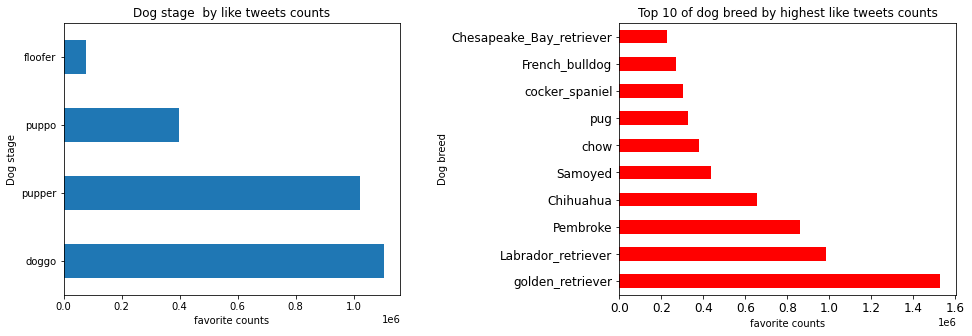

In [764]:
#Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
plt.subplots_adjust(wspace=0.65, hspace=0.5)
#First plot
top_high_by_stage.plot(kind='barh', ax=ax1)
ax1.set_title("Dog stage  by like tweets counts")
ax1.set_xlabel('favorite counts')
ax1.set_ylabel('Dog stage')

#Second plot
high_tweet_dog.plot(kind='barh',fontsize=12, ax=ax2, color='red')
ax2.set_title("Top 10 of dog breed by highest like tweets counts")
ax2.set_xlabel('favorite counts')
ax2.set_ylabel('Dog breed')
plt.show()

**7. Display the pictures of the 3 breeds of dogs whose tweets have received the highest number of likes.**

In [692]:
#list of top 3 name
name_top3 = list(high_tweet_dog.index)
name_top3

['golden_retriever', 'Labrador_retriever', 'Pembroke']

In [694]:
#extrat urls
import IPython

url_list=[]
for name in name_top3:
    extract_query = df_final_for_eda[df_final_for_eda["pred_dog_breed"] == name]
    url = extract_query['jpg_url'].sample(1).values[0]
    url_list.append(url)

url_list
    

['https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg',
 'https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg',
 'https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg']

Image of golden_retriever


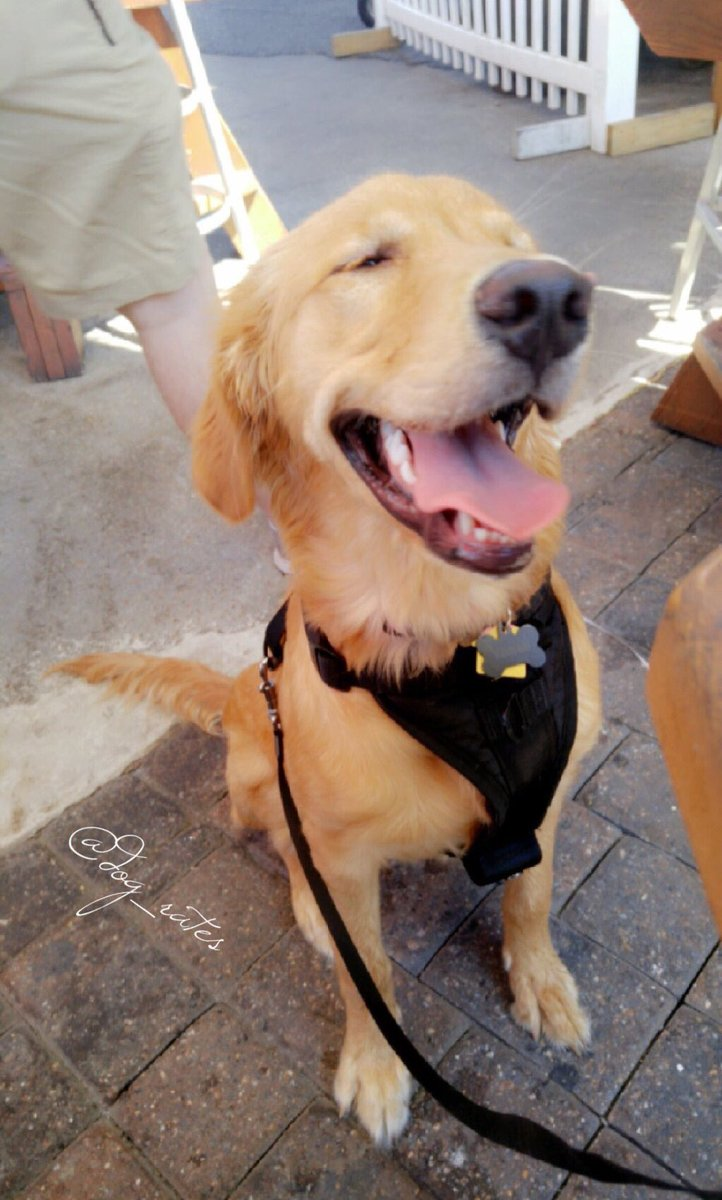

In [695]:
#display photos
print(f'Image of {name_top3[0]}') 
display(IPython.display.Image(url_list[0], width = 200))

Image of Labrador_retriever


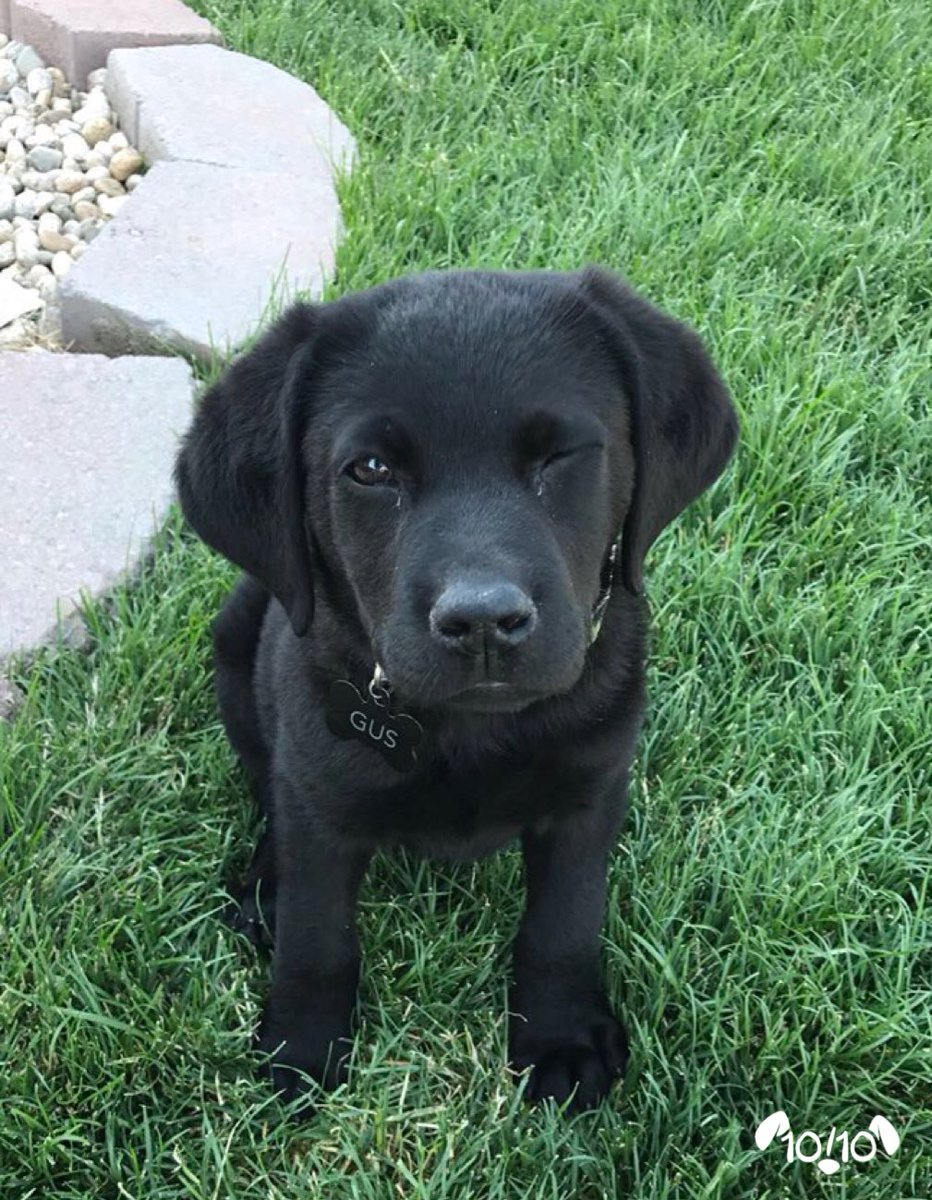

In [696]:
#display photos
print(f'Image of {name_top3[1]}') 
display(IPython.display.Image(url_list[1], width = 200))

Image of Pembroke


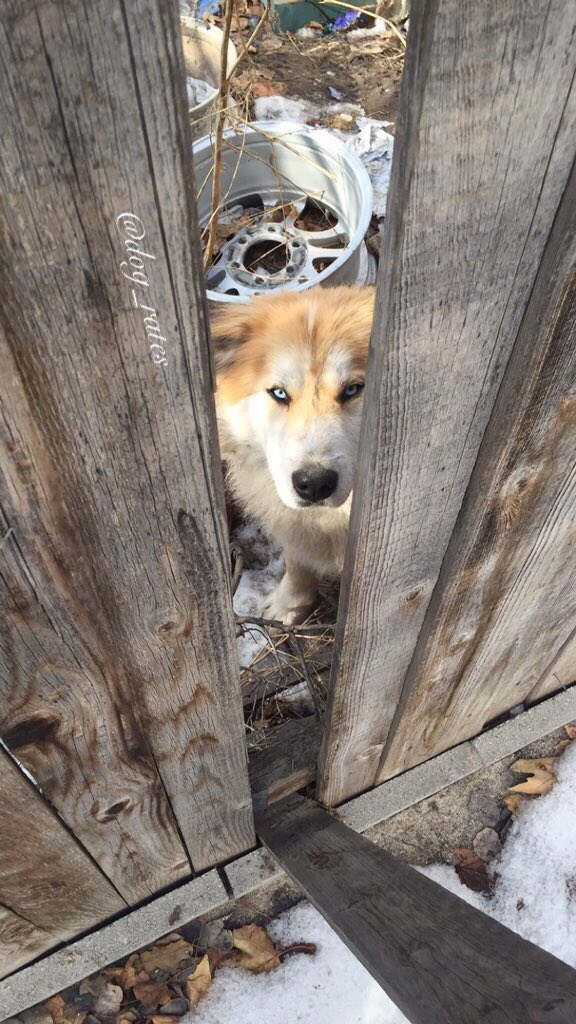

In [697]:
#display photos
print(f'Image of {name_top3[2]}') 
display(IPython.display.Image(url_list[2], width = 200))

**7. Display the pictures of the 3 breeds of dogs whose tweets have received the highest number of likes.**

In [699]:
#calculate Rsquare for correlation
from scipy import stats
x=df_final_for_eda.like_count.dropna()
y=df_final_for_eda.retweet_count.dropna()
pr = stats.pearsonr(x, y)[0]
print("R² =", round(pr,2))

R² = 0.93


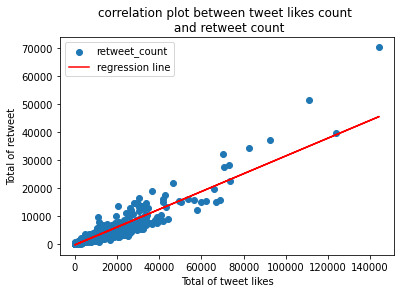

In [700]:
#correlation plot
plt.scatter(x="like_count", y="retweet_count", data=df_final_for_eda) #add scatter plot

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b, color="red", label="regression line") 
plt.legend()
plt.xlabel("Total of tweet likes")
plt.ylabel("Total of retweet")
plt.title("correlation plot between tweet likes count \n and retweet count")
plt.show()

**9. Display a word cloud of the different dog breeds present in the tweets**

In [612]:
!pip install wordcloud

In [704]:
#extract ext
text = df_final_for_eda.pred_dog_breed.dropna().str.cat(others=None, sep=' ')


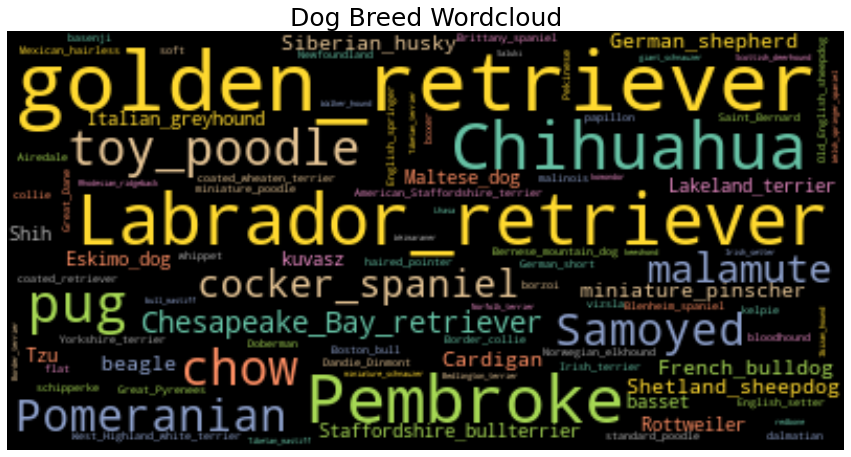

In [720]:
# Create and generate a word cloud image:
plt.figure(figsize=(15, 9))
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(max_words=2000,collocations = False, colormap='Set2',
               stopwords=STOPWORDS, max_font_size=40, random_state=42).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=25)
plt.axis("off")
plt.show()